In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [40]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
train_df['source'] = 'train'
test_df['source'] = 'test'
df = pd.concat([train_df,test_df],ignore_index=True)
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [42]:
df.tail()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [43]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [ ]:
Note that the 5681 missing values Outcome variable comes from the test dataset, which is normal as 
those are the values we are trying to predict. 
In terms of Item_Weight and Outlet_Size we will impute the missing values in the data cleaning section.
Below is a more visualise way of finding the missing values

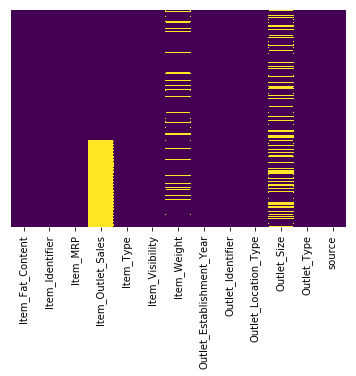

In [44]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [45]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [ ]:
Checks:

1.Item_Visibility has a minimum value of 0, 
which makes no sense because when a product is being sold in a store, the product cannot have 0 visibility
2.Outlet_Establishment_Years vary from 1985 to 2009.
If we can convert them to how old the particular store is, the variable should have a better impact on sales

In [46]:
df.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [ ]:
1.There are 1559 products and 10 outlet stores. There are 16 unique Item_Type. 
2.Let’s explore these categorical variables further! We want to return the 
unique values and frequency for each of these categorical variables (object). 
3.We will exclude the ID and source variable for obvious reason

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [48]:
categorical_new = [x for x in df.dtypes.index if df.dtypes[x] == 'object']


In [49]:
categorical_nonId = [x for x in categorical_new if x not in ['Item_Identifier','Outlet_Identifier','source']]

In [50]:
for item in categorical_nonId:
    print('\nFrequency of Categories for variable %s' %item)
    print(df[item].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

In [ ]:
Observations

1.With Item_Fat_Content, there are some mislabelling which we need to clean up
2.With Item_Type, we can try to combine different categories as not all categories have substantial frequency
3.With Outlet_Type, we could combine Type2 and Type3 but we should check if that’s a good idea

In [ ]:
DATA CLEANING

In [51]:
#imputing missing values
from sklearn.preprocessing import Imputer
#imputing Item_weigth missimg vales
imputer = Imputer(missing_values='NaN',  strategy= 'mean' , axis=0)
imputer = imputer.fit(df[['Item_Weight']])
df['Item_Weight'] = imputer.transform(df[['Item_Weight']])
df['Item_Weight'].isna().sum()


0

In [52]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns = 'Outlet_Type',aggfunc=lambda x: x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [53]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size

In [54]:
print ('Orignal #missing: %d'%sum(df['Outlet_Size'].isnull()))
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [ ]:
FEATURE ENGINEERING

In [ ]:
A. Combining Outlet_Type
    In the data exploration section, we decided to consider combining the Supermarket Type2 and Type3 variables. 
    In order to check if this is a good idea we can analyse the mean sales by the type of store.
    If they have similar sales, then keeping them separate won’t help much

In [55]:
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [ ]:
The above shows significant difference between Supermarket Type2 and Type3, therefore, we will leave them separate as it is.

In [ ]:
B. Modify Item_Visibility
    We noticed at the beginning that the minimum value for Item_Visibility is 0, which doesn’t make any sense.
    We have decided to treat the 0 like missing information and impute it with mean visibility of that product

In [57]:
visibility_item_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier',aggfunc='mean')
visibility_item_avg.head()

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799


In [58]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility

In [59]:
print ('Original #zeros: %d'%sum(df['Item_Visibility'] == 0))
df['Item_Visibility'] = df[['Item_Visibility','Item_Identifier']].apply(impute_visibility_mean,axis=1).astype(float)
print ('Final #zeros: %d'%sum(df['Item_Visibility'] == 0))


Original #zeros: 879
Final #zeros: 0


In [60]:
df['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
C. Create a broad category of Item_Type
    Earlier, we saw 16 unique categories in the Item_Type variable but some categories have very little ‘frequency’.
    It might be a good idea to combine the categories. One way could be to assign a new category to each.
    If you look at the Item_Identifier, it starts with FD, DR or NC which seems to indicate Food, Drinks and Non-Consumables.
    Let’s use this to set up new categories

In [61]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [62]:
df['Item_Type_New'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [63]:
df['Item_Type_New'] = df['Item_Type_New'].map({'FD': 'Food',
'DR': 'Drinks',
'NC': 'Non-Consumable'})

In [64]:
df['Item_Type_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_New, dtype: int64

In [ ]:
D. Years of store operation
    -The latest year within our data is 2013 so we can use this and the establishment year variable to calculate the years 
    of operation of a store.
    -The result shows that store in our dataset are 4 – 28 years old.

In [65]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [ ]:
E. Modify Item_Fat_Content
Earlier, we spotted that there are some mislabelling in the Item_Fat_Content variable.
In addition, we noticed that some non-consumables are labelled as ‘Low Fat’ content which doesn’t make sense so
we are going to fix this too by creating a separate category to spot this!


In [66]:
print('Original Categories:')
print(df['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [67]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
'low fat': 'Low Fat',
'reg': 'Regular'})
print('Modified Categories:')
print(df['Item_Fat_Content'].value_counts())

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [68]:
df.loc[df['Item_Type_New'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [69]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_New,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


In [ ]:
F. Numerical and Categorical Variables – Dummy variables
    Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types. 
    Let’s start with turning all categorical variables into numerical values using LabelEncoder 
    (Encode labels with value between 0 and n_classes-1) from sklearn’s preprocessing module!
    After that, we can use get_dummies to generate dummy variables from these numerical categorical variables

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_New','Outlet_Type','Outlet']
le = LabelEncoder()
for i in cat_var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_New,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,2,26,1


In [71]:
df = pd.get_dummies(df, columns = cat_var_mod)

In [73]:
df.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_New_0                uint8
Item_Type_New_1                uint8
Item_Type_New_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
O

In [ ]:
G. Exporting Data
    Final step of this section is to convert the data back to train and test datasets.
    We also need to do some final tidying of deleting some columns before and after the split.

In [74]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)


In [75]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [88]:
train.drop(['source'],axis=1,inplace=True)

ValueError: labels ['source'] not contained in axis

In [33]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [37]:
train_df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,train,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,train,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [172]:
X_train = train_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
Y_train = train_df['Item_Outlet_Sales']
X_test = test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [173]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
X_test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [176]:
lr_pred = regressor.predict(X_test)

In [133]:
X_train = X_train.drop(['Item_Fat_Content_0','Outlet_Location_Type_0','Outlet_0','Outlet_Size_0'],axis=1).copy()
#dummy trap rescued

In [140]:
df.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,train,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,train,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,train,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,train,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [149]:
import statsmodels.formula.api as sm
#df = pd.DataFrame(X_train,Y_train)
f = 'Item_Outlet_Sales ~ Item_MRP + Item_Visibility + Outlet_Years + Item_Fat_Content_1 + Outlet_1 + Outlet_2 + Outlet_3 + Outlet_4 + Outlet_5 + Outlet_6+ Outlet_7 + Outlet_8 + Outlet_9'
result = sm.ols(formula=f, data=df).fit()



In [150]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     914.9
Date:                Fri, 28 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:02:00   Log-Likelihood:                -71992.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8510   BIC:                         1.441e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1535.4950     53.809    -28.536      0.000   -1640.974   -1430.016
Item_MRP              15.5619      0.196     79.265      0.000      15.177      15.947
Item_Visibility     -200.2391    256.976     -0.779      0.436    -703.974     303.496
Outlet_Years         -19.0665      1.390    -13.717      0.000     -21.791     -16.342
Item_Fat_Content_1   -44.1784     31.419     -1.406      0.160    -105.767      17.410
Outlet_1            2150.6891     64.781     33.199      0.000    2023.702    2277.677
Outlet_2            1842.1312     56.959     32.341      0.000    1730.478    1953.784
Outlet_3            1423.7947     55.734     25.546      0.000    1314.542    1533.048
Outlet_4             264.8663     68.245      3.881      0.000     131.090     398.643
Outlet_5            3608.5587     65.295     55.265      0.000    3480.564    3736.553
Outlet_6            1939.6070     58.634     33.080      0.000    1824.670    2054.544
Outlet_7            1765.2935     59.642     29.598      0.000    1648.380    1882.207
Outlet_8            1929.3234     61.758     31.240      0.000    1808.263    2050.384
Outlet_9            1988.3311     60.954     32.620      0.000    1868.846    2107.816
==============================================================================
Omnibus:                      961.462   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2295.554
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                     1.13e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
lr_pred = 

In [177]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(X_train,Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [179]:
tree_pred = tree.predict(X_test)

In [200]:
tree_accuracy = round(tree.score(X_train,Y_train),2)
tree_accuracy

0.61

In [193]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,max_depth=6, min_samples_leaf=100,n_jobs=4)    
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [194]:
rf_accuracy = round(rf.score(X_train,Y_train),2)
rf_accuracy

0.61

In [201]:
rf_pred = rf.predict(X_test)

In [202]:
rf_submission = pd.DataFrame({
'Item_Identifier':test_df['Item_Identifier'],
'Outlet_Identifier':test_df['Outlet_Identifier'],
'Item_Outlet_Sales': rf_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [203]:
rf_submission.to_csv('rf_algo.csv',index=False)

In [205]:
tree_submission = pd.DataFrame({
'Item_Identifier':test_df['Item_Identifier'],
'Outlet_Identifier':test_df['Outlet_Identifier'],
'Item_Outlet_Sales': tree_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [206]:
tree_submission.to_csv('tree_algo.csv',index=False)